In [ ]:
#pip install python-bidi

In [1]:
import pandas as pd
import numpy as np

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import string

from tashaphyne.stemming import ArabicLightStemmer
import arabicstopwords.arabicstopwords as stp
from ar_corrector.corrector import Corrector
import re

import nltk
from nltk.corpus import stopwords
import wordcloud
from nltk.tokenize import word_tokenize
from nltk.stem.isri import ISRIStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.cluster import DBSCAN, SpectralClustering, MeanShift
from sklearn.preprocessing import StandardScaler

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# df=pd.read_csv('new.csv')
# df2=pd.read_csv('try.csv')
df = pd.read_csv('/Users/reema/Desktop/‎⁨البوابة القضائية nlpالعلمية⁩.csv')

In [3]:
df

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F13,F15,F16,judgment_text,Field17,Field18,F17,F18,F19,F20
0,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/39860,القضية رقم ٥٤٨٣ لعام ١٤٤٢ هـ,تاريخها: ٢٦/١١/١٤٤٣\n ...,رقم القضية - القرار: ٥٤٨٣\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ٥٤٨٣ لعام ١٤٤٢ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,حجم الخط,مشاركة,طباعة,1088.0
1,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/41108,القضية رقم ٣٣٢ لعام ١٤٤٢ هـ,تاريخها: ٢٦/١٠/١٤٤٢\n ...,رقم القضية - القرار: ٣٣٢\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ٣٣٢ لعام ١٤٤٢ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,\n الاس...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,حجم الخط,مشاركة,طباعة,562.0
2,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/35243,القضية رقم ٣٢٣٢ لعام ١٤٤٢ هـ,تاريخها: ٢٧/١١/١٤٤٢\n ...,رقم القضية - القرار: ٣٢٣٢\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ٣٢٣٢ لعام ١٤٤٢ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,\n الاس...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,حجم الخط,مشاركة,طباعة,7080.0
3,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/40255,القضية رقم ٦٠٥ لعام ١٤٤١ هـ,تاريخها: ١٢/٣/١٤٤٣\n ...,رقم القضية - القرار: ٦٠٥\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ٦٠٥ لعام ١٤٤١ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,حجم الخط,مشاركة,طباعة,345.0
4,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/40285,القضية رقم ٦٠٥ لعام ١٤٤١ هـ,تاريخها: ١٢/٣/١٤٤٣\n ...,رقم القضية - القرار: ٦٠٥\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ٦٠٥ لعام ١٤٤١ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,NaN,NaN,حجم الخط,مشاركة,طباعة,273.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2131,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/26831,القضية رقم ٤٨٣٨ لعام ١٤٤٠ هـ,تاريخها: ١٧/٤/١٤٤٢\n ...,رقم القضية - القرار: ٤٨٣٨\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ٤٨٣٨ لعام ١٤٤٠ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,\n الاس...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,حجم الخط,مشاركة,طباعة,8.0
2132,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/26990,القضية رقم ١٢٥١٠ لعام ١٤٤٠ هـ,تاريخها: ٤/٣/١٤٤٢\n ...,رقم القضية - القرار: ١٢٥١٠\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ١٢٥١٠ لعام ١٤٤٠ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,\n الاس...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,حجم الخط,مشاركة,طباعة,8.0
2133,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/31270,القضية رقم ٢٤٩ لعام ١٤٤٢ هـ,تاريخها: ٢٢/٨/١٤٤٢\n ...,رقم القضية - القرار: ٢٤٩\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ٢٤٩ لعام ١٤٤٢ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,حجم الخط,مشاركة,طباعة,15.0
2134,مجموعة الأحكام القضائية,https://sjp.moj.gov.sa/Filter/AhkamDetails/31271,القضية رقم ٢٥٩ لعام ١٤٤٢ هـ,تاريخها: ٢٢/٨/١٤٤٢\n ...,رقم القضية - القرار: ٢٥٩\n ...,\n بيانات ا...,\n ...,بحث متقدم,الصفحة الرئيسية,التصنيف,...,\n عنوا...,القضية رقم ٢٥٩ لعام ١٤٤٢ هـ,\n نص ا...,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,NaN,NaN,حجم الخط,مشاركة,طباعة,15.0


In [4]:
df.columns

Index(['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10', 'F11',
       'Field4', 'Field5', 'Field6', 'Field7', 'Field8', 'Field9', 'Field10',
       'Field11', 'F12', 'F13', 'F15', 'F16', 'judgment_text', 'Field17',
       'Field18', 'F17', 'F18', 'F19', 'F20'],
      dtype='object')

In [7]:
df.rename(columns={'F2':'link','F5':'court_id', 'Field7':'court_date','Field4':'court','Field5':'city','Field9':'region','Field18':'appeal_court'}, inplace=True)


In [8]:
df = df[['link','court','court_id','court_date','judgment_text','city','region','appeal_court']].copy()
# df = df[['court','court_id','court_date','judgment_text','city','region']].copy()

In [9]:
pd.set_option('display.max_columns', 30)

In [10]:
# r = [df, df2]
# df = pd.concat(r)
# df.drop_duplicates(inplace=True)

In [11]:
df

,link,court,court_id,court_date,judgment_text,city,region,appeal_court
0,https://sjp.moj.gov.sa/Filter/AhkamDetails/39860,المحكمة: المحكمة التجارية,رقم القضية - القرار: ٥٤٨٣\n ...,تاريخها: ٢٦/١١/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,المدينه: الرياض,NaN,NaN
1,https://sjp.moj.gov.sa/Filter/AhkamDetails/41108,المحكمة: المحكمة العامة,رقم القضية - القرار: ٣٣٢\n ...,تاريخها: ٢٦/١٠/١٤٤٢,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,المدينه: بريدة,المدينة: منطقة الرياض,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
2,https://sjp.moj.gov.sa/Filter/AhkamDetails/35243,المحكمة: المحكمة التجارية,رقم القضية - القرار: ٣٢٣٢\n ...,تاريخها: ٢٧/١١/١٤٤٢,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,المدينه: الدمام,المدينة: المنطقة الشرقية,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
3,https://sjp.moj.gov.sa/Filter/AhkamDetails/40255,المحكمة: المحكمة العامة,رقم القضية - القرار: ٦٠٥\n ...,تاريخها: ١٢/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,المدينه: بريدة,NaN,NaN
4,https://sjp.moj.gov.sa/Filter/AhkamDetails/40285,المحكمة: المحكمة العامة,رقم القضية - القرار: ٦٠٥\n ...,تاريخها: ١٢/٣/١٤٤٣,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...,المدينه: بريدة,NaN,NaN
...,...,...,...,...,...,...,...,...
2131,https://sjp.moj.gov.sa/Filter/AhkamDetails/26831,المحكمة: المحكمة التجارية,رقم القضية - القرار: ٤٨٣٨\n ...,تاريخها: ١٧/٤/١٤٤٢,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,المدينه: جدة,المدينة: منطقة مكة المكرمة,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
2132,https://sjp.moj.gov.sa/Filter/AhkamDetails/26990,المحكمة: المحكمة التجارية,رقم القضية - القرار: ١٢٥١٠\n ...,تاريخها: ٤/٣/١٤٤٢,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,المدينه: الرياض,المدينة: منطقة الرياض,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
2133,https://sjp.moj.gov.sa/Filter/AhkamDetails/31270,المحكمة: المحكمة العامة,رقم القضية - القرار: ٢٤٩\n ...,تاريخها: ٢٢/٨/١٤٤٢,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,المدينه: بريدة,NaN,NaN
2134,https://sjp.moj.gov.sa/Filter/AhkamDetails/31271,المحكمة: المحكمة العامة,رقم القضية - القرار: ٢٥٩\n ...,تاريخها: ٢٢/٨/١٤٤٢,الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...,المدينه: بريدة,NaN,NaN


In [12]:
df.drop_duplicates(subset ="judgment_text",inplace=True)

In [13]:
df.dropna(subset=['judgment_text'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2043 entries, 0 to 2135
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   link           2043 non-null   object
 1   court          2043 non-null   object
 2   court_id       2043 non-null   object
 3   court_date     2043 non-null   object
 4   judgment_text  2043 non-null   object
 5   city           2043 non-null   object
 6   region         1237 non-null   object
 7   appeal_court   1237 non-null   object
dtypes: object(8)
memory usage: 143.6+ KB


In [15]:
df.duplicated().sum()

0

In [16]:
df_Train, df_test = train_test_split(df, test_size=0.2, random_state= 30)

df_train, df_val = train_test_split(df_Train, test_size=0.2, random_state= 30)

In [17]:
df_train.drop_duplicates(subset ="judgment_text",inplace=True)

In [18]:
df_train.drop_duplicates(subset ="court_id",inplace=True)

In [19]:
print(f'Shape of train:', df_train.shape)
print(f'Shape of validation:', df_val.shape)
print(f'Shape of test:', df_test.shape)

Shape of train: (1284, 8)
Shape of validation: (327, 8)
Shape of test: (409, 8)


In [20]:
df_train.isnull().sum()

link               0
court              0
court_id           0
court_date         0
judgment_text      0
city               0
region           517
appeal_court     517
dtype: int64

In [21]:
df_val.isnull().sum()

link               0
court              0
court_id           0
court_date         0
judgment_text      0
city               0
region           105
appeal_court     105
dtype: int64

In [22]:
# df_train.appeal_court.value_counts(),

In [23]:
# df_val.appeal_court.value_counts(),

In [24]:
df_train['appeal_court'].fillna(df_train['appeal_court'].mode()[0], inplace = True)

In [25]:
 df_val['appeal_court'].fillna(df_val['appeal_court'].mode()[0], inplace = True)

In [26]:
# df_train.appeal_id.value_counts()

In [27]:
# df_val.appeal_id.value_counts()

In [28]:
# df_train.dropna(subset=['appeal_id'], inplace=True);

In [29]:
# df_val.dropna(subset=['appeal_id'], inplace=True);

In [30]:
# df_train['appeal_date'] = df_train['appeal_date'].str.replace('تاريخه:','')

In [31]:
# df_val['appeal_date'] = df_val['appeal_date'].str.replace('تاريخه:','')

In [32]:
# df_train['appeal_id'] = df_train['appeal_id'].str.replace('رقم القرار:','')

In [33]:
# df_val['appeal_id'] = df_val['appeal_id'].str.replace('رقم القرار:','')

In [34]:
# df_val['appeal_date'] = df_val['appeal_id'].str.replace('رقم القرار:','')

In [35]:
df_train['court'] = df_train['court'].str.replace('المحكمة:','')

In [36]:
df_train['court_id'] = df_train['court_id'].str.replace('رقم القضية - القرار:','')

In [37]:
df_val['court_id'] = df_val['court_id'].str.replace('رقم القضية - القرار:','')

In [38]:
df_train['court_date'] = df_train['court_date'].str.replace('تاريخها: ','')

In [39]:
df_val['court_date'] = df_val['court_date'].str.replace('تاريخها: ','')

In [40]:
# df_train['appeal_court'] = df_train['appeal_court'].str.replace('محكمة الاستئناف: ','')

In [41]:
# df_val['appeal_court'] = df_val['appeal_court'].str.replace('محكمة الاستئناف: ','')

In [42]:
df_train['region'] = df_train['region'].str.replace('المدينة: ','')

In [43]:
df_val['region'] = df_val['region'].str.replace('المدينة: ','')

In [44]:
df_train['city'] = df_train['city'].str.replace('المدينه: ','')

In [45]:
df_val['city'] = df_val['city'].str.replace('المدينه: ','')

In [46]:
df_train.city.value_counts()

الرياض             613
الدمام             279
جدة                183
المدينة المنورة     62
بريدة               31
أبها                30
جازان               28
تبوك                11
عرعر                11
سكاكا               10
حائل                10
مكة المكرمة          8
الباحة               7
نجران                1
Name: city, dtype: int64

In [47]:
df_train.judgment_text

401     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
967     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
206     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
502     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
1957    الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
                              ...                        
809     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
680     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
1446    الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
1554    الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
361     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
Name: judgment_text, Length: 1284, dtype: object

In [48]:
df_train.judgment_text

401     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
967     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
206     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
502     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
1957    الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
                              ...                        
809     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
680     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
1446    الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
1554    الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:\...
361     الحمد لله والصلاة والسلام على رسول ﷲ أما بعد:ف...
Name: judgment_text, Length: 1284, dtype: object

# EDA

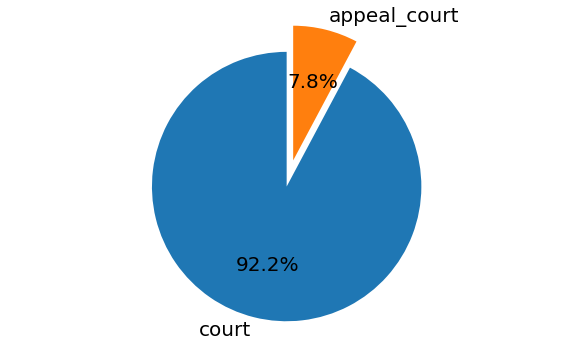

In [126]:
import matplotlib.pyplot as plt
labels = ['court',  'appeal_court']
#myexplode = [0.2, 0]
cancel_fig, cancel_ax = plt.subplots(figsize=[10,6])
cancel_ax.pie(df_train['court'].value_counts(), autopct='%1.1f%%',
     startangle=90,  explode = myexplode, textprops={'color':"black", 'fontsize':20}, labels=labels)
cancel_ax.axis('equal'); 


In [69]:
import arabic_reshaper
from bidi.algorithm import get_display

In [141]:
Most_Reigon = df.groupby(df.region).court_id.sum().sort_values(ascending=False )

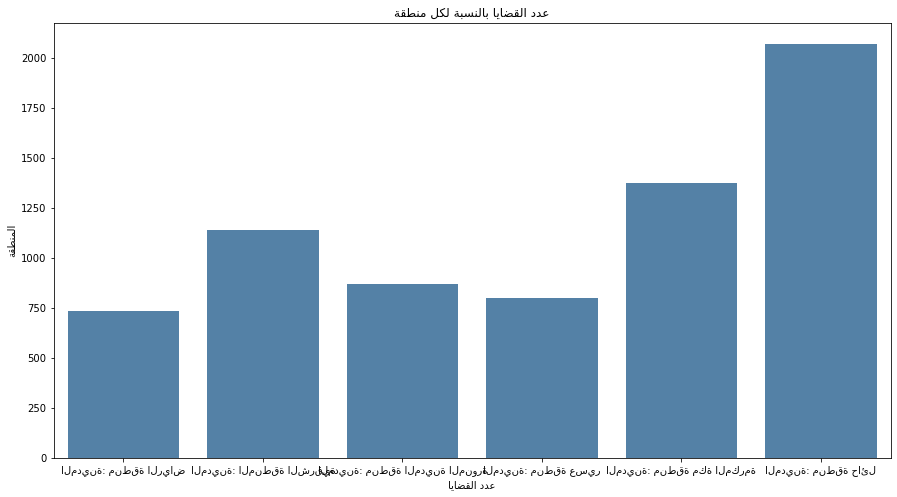

In [143]:
plt.figure(figsize=(15, 8))

fig1 = sns.barplot(x =df.region  , y = df.court_id.index, data = Most_Reigon , color = "#4682B4", ci=True)

plt.xlabel(get_display( arabic_reshaper.reshape('عدد القضايا')))
plt.ylabel(get_display( arabic_reshaper.reshape('المنطقة')))
plt.title(get_display( arabic_reshaper.reshape('عدد القضايا بالنسبة لكل منطقة')));

In [50]:
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations
df_train.judgment_text = df_train.judgment_text.apply(lambda x: x.translate(str.maketrans('', '', punctuations_list)))
# df_train.appeal_text = df_train.appeal_text.apply(lambda x: x.translate(str.maketrans('', '', punctuations_list)))

In [ ]:
df_train.judgment_text = df_train.judgment_text.apply(lambda x: x.translate(str.maketrans('', '', punctuations_list)))
df_val.judgment_text = df_val.judgment_text.apply(lambda x: x.translate(str.maketrans('', '', punctuations_list)))
# df_val.appeal_text = df_val.appeal_text.apply(lambda x: x.translate(str.maketrans('', '', punctuations_list)))

In [ ]:
df_train

# Preprocessing

In [ ]:
df_train.info()

### Remove stopwords

In [ ]:
df_train['judgment_text'] = df_train['judgment_text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stp.stopwords_list()]))
# df_train['appeal_text'] = df_train['appeal_text'].apply(lambda y: ' '.join([word for word in y.split() if word not in stp.stopwords_list()]))


### Correct words

In [ ]:
corr = Corrector()
# df_train['judgment_text'] = df_train['judgment_text'].apply(lambda x: corr.spell_correct(x))

### Remove digits

In [ ]:
df_train['judgment_text'] = df_train['judgment_text'].apply(lambda x: re.sub('\w*\d\w*', '', x))
# df_train['appeal_text'] = df_train['appeal_text'].apply(lambda x: re.sub('\w*\d\w*', '', x))

In [ ]:
# df_train['judgment_text'] = df_train['judgment_text'].str.replace('\n','')
# df_train['judgment_text'] = df_train['court_id'].str.replace('\n','')
# df_train['judgment_text'] = df_train['court_date'].str.replace('\n','')

In [ ]:
df_train.judgment_text[0]

In [ ]:
ArListem = ArabicLightStemmer()
ArListem.light_stem('منجزين')

In [ ]:
ISRIStemmer().suf32("منجزين")

In [ ]:
df_train['judgment_text'] = df_train['judgment_text'].apply(lambda x: ArListem.light_stem(x))
df_train['judgment_text'] = df_train['judgment_text'].apply(lambda x: ISRIStemmer().suf32(x))


In [ ]:
# corr.spell_correct(df_train['judgment_text'][0])

In [ ]:
df_train['judgment_text']

# remove english words

In [ ]:
df_train.judgment_text = df_train.judgment_text.apply(lambda x: re.sub('([@A-Za-z0-9_]+)|[^\w\s]|#|http\S+', '', x) )

In [ ]:
df_train.court_id = df_train.court_id.str.strip()

In [ ]:
df_train.judgment_text = df_train.judgment_text.str.strip()

In [ ]:
df_train.drop_duplicates(subset ="judgment_text",inplace=True)

In [ ]:
df_train.drop_duplicates(subset ="court_id",inplace=True)

# TF-IDF

In [ ]:
df_train.drop_duplicates(subset ="judgment_text",inplace=True)

In [ ]:
cv_tfidf = TfidfVectorizer(min_df=2, max_df=0.8)
x = cv_tfidf.fit_transform(df_train['judgment_text']).toarray()

In [ ]:
x

In [ ]:
dt_tfidf = pd.DataFrame(x,columns=cv_tfidf.get_feature_names())
dt_tfidf


# Cosine similarity


In [ ]:
# df.to_csv('new.csv',index=False)

In [ ]:
from numpy import dot
from numpy.linalg import norm
from sklearn.metrics.pairwise import cosine_similarity


cosine_similarity(dt_tfidf.iloc[:,1:2],dt_tfidf.iloc[:,2:3])
cosine = lambda v1, v2: dot(v1, v2) / (norm(v1) * norm(v2))


In [ ]:
dt_tfidf.iloc[:,1:2].shape

In [ ]:
dt_tfidf.iloc[:,1:2].shape

In [ ]:
dt_tfidf.shape

In [ ]:
cosine_similarity(dt_tfidf.iloc[0:16, :],dt_tfidf)

In [ ]:
x

In [ ]:
'''x = range(0,1283)
y = range(0,1283)
for i in x:
    for j in y:
        if cosine(dt_tfidf.iloc[i],dt_tfidf.iloc[j]) >= 0.5 and i != j:
            print("---------",cosine(dt_tfidf.iloc[i],dt_tfidf.iloc[j]))
            print('i= ', i)
            print('j= ', j)'''
        

In [ ]:
a = set(df_train.judgment_text.iloc[37].split())

In [ ]:
b = set(df_train.judgment_text.iloc[78].split())

In [ ]:
a-b

In [ ]:
b-a

In [ ]:
df_train.iloc[37]

In [ ]:
df_train.iloc[78]

In [ ]:
df_train.judgment_text.duplicated().sum()

In [ ]:
df_train.judgment_text.iloc[37]

In [ ]:
df_train.judgment_text.iloc[78]